## Exemplos


### Previsão de preços de casas

In [32]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# carrega o dataset California Housing
housing = fetch_california_housing()

type(housing)
dir(housing)
df = pd.DataFrame(data= np.c_[housing['data'], housing['target']], columns= housing['feature_names'] + ['target'])

In [30]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [33]:
df.shape

(20640, 9)

In [34]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'target'],
      dtype='object')

In [ ]:
# separa o conjunto de treinamento e de teste
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size = 0.2, random_state = 42)

# cria o modelo de regressão linear
model = LinearRegression()

# treina o modelo usando o conjunto de treinamento
model.fit(X_train, y_train)

In [39]:
print(X_train[:3])

[[ 3.25960000e+00  3.30000000e+01  5.01765650e+00  1.00642055e+00
   2.30000000e+03  3.69181380e+00  3.27100000e+01 -1.17030000e+02]
 [ 3.81250000e+00  4.90000000e+01  4.47354497e+00  1.04100529e+00
   1.31400000e+03  1.73809524e+00  3.37700000e+01 -1.18160000e+02]
 [ 4.15630000e+00  4.00000000e+00  5.64583333e+00  9.85119048e-01
   9.15000000e+02  2.72321429e+00  3.46600000e+01 -1.20480000e+02]]


In [40]:
print(X_test[:3])

[[ 1.68120000e+00  2.50000000e+01  4.19220056e+00  1.02228412e+00
   1.39200000e+03  3.87743733e+00  3.60600000e+01 -1.19010000e+02]
 [ 2.53130000e+00  3.00000000e+01  5.03938356e+00  1.19349315e+00
   1.56500000e+03  2.67979452e+00  3.51400000e+01 -1.19460000e+02]
 [ 3.48010000e+00  5.20000000e+01  3.97715472e+00  1.18587747e+00
   1.31000000e+03  1.36033229e+00  3.78000000e+01 -1.22440000e+02]]


In [41]:
print(y_test[:3])

[0.477   0.458   5.00001]


In [42]:
print(y_train[:3])

[1.03  3.821 1.726]


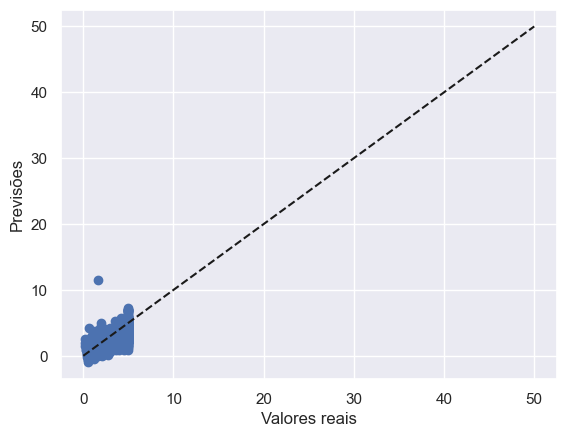

In [43]:
# faz as previsões usando o conjunto de teste
y_pred = model.predict(X_test)

# plota as previsões em relação aos valores reais do conjunto de teste
plt.scatter(y_test, y_pred)
plt.plot([0, 50], [0, 50], '--k')
plt.xlabel('Valores reais')
plt.ylabel('Previsões')
plt.show()

In [44]:
y_pred

array([0.71912284, 1.76401657, 2.70965883, ..., 4.46877017, 1.18751119,
       2.00940251])

## Mercado Financeiro

In [45]:
# carrega os pacotes
import pandas as pd
import numpy as np
import pandas_datareader.data as pdr
from sklearn import linear_model

# !pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override()

In [46]:
# datas
inicio = '2019-01-01'
fim = '2023-04-24'

# ticker
symbol = 'ITUB4.SA'

# importa os dados
data = pdr.get_data_yahoo(tickers = symbol,
                        start = inicio,
                        end = fim)[['Close']]

# Log retornos
data['returns'] = np.log(data / data.shift(1))

# Direção dos retornos (positivo/negativo)
data['direction'] = np.sign(data['returns'])

[*********************100%***********************]  1 of 1 completed


C:\Users\andre\AppData\Local\Temp\ipykernel_26944\2458623854.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['returns'] = np.log(data / data.shift(1))
C:\Users\andre\AppData\Local\Temp\ipykernel_26944\2458623854.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['direction'] = np.sign(data['returns'])


In [47]:
lags = 2 # lags utilizados para prever o direcionamento

# função para criar os lags
def create_lags(data):
  global cols
  cols = []
  for lag in range(1, lags + 1):
    col = 'lag_{}'.format(lag)
    data[col] = data['returns'].shift(lag)
    cols.append(col)

In [48]:
create_lags(data)
data.dropna(inplace = True)

C:\Users\andre\AppData\Local\Temp\ipykernel_26944\4162798390.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data['returns'].shift(lag)
C:\Users\andre\AppData\Local\Temp\ipykernel_26944\4162798390.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data['returns'].shift(lag)
C:\Users\andre\AppData\Local\Temp\ipykernel_26944\1989682853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pan

In [49]:
# função para criar os sinais (valores das variáveis dependentes)
def create_bins(data, bins=[0]):
  global cols_bin
  cols_bin = []
  for col in cols:
    col_bin = col + '_bin'
    data[col_bin] = np.digitize(data[col], bins=bins)
    cols_bin.append(col_bin)

In [50]:
create_bins(data)

data

C:\Users\andre\AppData\Local\Temp\ipykernel_26944\336820246.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col_bin] = np.digitize(data[col], bins=bins)
C:\Users\andre\AppData\Local\Temp\ipykernel_26944\336820246.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col_bin] = np.digitize(data[col], bins=bins)


,Close,returns,direction,lag_1,lag_2,lag_1_bin,lag_2_bin
Date,,,,,,,
2019-01-07,37.049999,0.001891,1.0,-0.016893,0.016352,0,1
2019-01-08,37.520000,0.012606,1.0,0.001891,-0.016893,1,0
2019-01-09,38.090000,0.015078,1.0,0.012606,0.001891,1,1
2019-01-10,37.830002,-0.006849,-1.0,0.015078,0.012606,1,1
2019-01-11,37.599998,-0.006098,-1.0,-0.006849,0.015078,0,1
...,...,...,...,...,...,...,...
2023-04-14,26.010000,0.014327,1.0,0.000000,0.006652,1,1
2023-04-17,25.959999,-0.001924,-1.0,0.014327,0.000000,1,1
2023-04-18,25.940001,-0.000771,-1.0,-0.001924,0.014327,0,1


In [51]:
# Modelo utilizado
models = {
'log_reg': linear_model.LogisticRegression()
}

# Função para rodar os modelos
def fit_models(data):
  mfit = {model: models[model].fit(data[cols_bin],
                                  data['direction'])
         for model in models.keys()}

In [52]:
fit_models(data)

In [53]:
# Retira as posição dos valores previstos
def derive_positions(data):
    for model in models.keys():
        data['pos_' + model] = models[model].predict(data[cols_bin])

In [54]:
derive_positions(data)

C:\Users\andre\AppData\Local\Temp\ipykernel_26944\2680417020.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['pos_' + model] = models[model].predict(data[cols_bin])


In [55]:
# Função para avaliar a estratégia
def evaluate_strats(data):
  global sel
  sel = []
  for model in models.keys():
      col = 'strat_' + model
      data[col] = data['pos_' + model] * data['returns']
      sel.append(col)
  sel.insert(0, 'returns')

In [56]:
evaluate_strats(data)

C:\Users\andre\AppData\Local\Temp\ipykernel_26944\1663186477.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data['pos_' + model] * data['returns']


<Axes: xlabel='Date'>

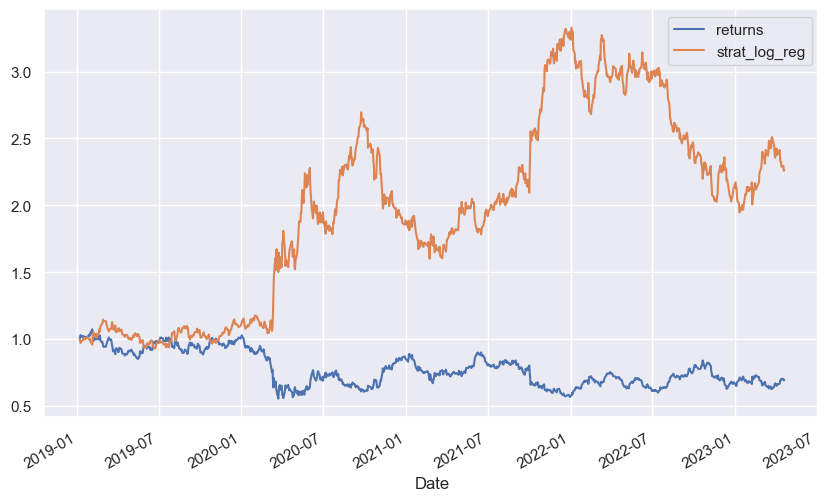

In [57]:
import seaborn as sns
sns.set()

data[sel].cumsum().apply(np.exp).plot(figsize=(10, 6))